<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/supervisedlearning_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [47]:
df=pd.read_csv("creditcard_sampledata.csv")


In [48]:
df.shape

(5723, 32)

In [49]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0.0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0.0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0.0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0.0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5723 non-null   int64  
 1   Time        5723 non-null   int64  
 2   V1          5723 non-null   float64
 3   V2          5723 non-null   float64
 4   V3          5723 non-null   float64
 5   V4          5723 non-null   float64
 6   V5          5723 non-null   float64
 7   V6          5722 non-null   float64
 8   V7          5722 non-null   float64
 9   V8          5722 non-null   float64
 10  V9          5722 non-null   float64
 11  V10         5722 non-null   float64
 12  V11         5722 non-null   float64
 13  V12         5722 non-null   float64
 14  V13         5722 non-null   float64
 15  V14         5722 non-null   float64
 16  V15         5722 non-null   float64
 17  V16         5722 non-null   float64
 18  V17         5722 non-null   float64
 19  V18         5722 non-null  

In [51]:
df = df.dropna(subset=['Class'], axis=0)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5722 entries, 0 to 5721
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5722 non-null   int64  
 1   Time        5722 non-null   int64  
 2   V1          5722 non-null   float64
 3   V2          5722 non-null   float64
 4   V3          5722 non-null   float64
 5   V4          5722 non-null   float64
 6   V5          5722 non-null   float64
 7   V6          5722 non-null   float64
 8   V7          5722 non-null   float64
 9   V8          5722 non-null   float64
 10  V9          5722 non-null   float64
 11  V10         5722 non-null   float64
 12  V11         5722 non-null   float64
 13  V12         5722 non-null   float64
 14  V13         5722 non-null   float64
 15  V14         5722 non-null   float64
 16  V15         5722 non-null   float64
 17  V16         5722 non-null   float64
 18  V17         5722 non-null   float64
 19  V18         5722 non-null  

# Initial EDA

In [52]:
# Count the occurrences of fraud - 1 and no fraud -0 and print them
occ = df['Class'].value_counts()
print(occ)

0.0    5708
1.0      14
Name: Class, dtype: int64


In [53]:
# Print the ratio of fraud cases
print(occ / len(df))

0.0    0.997553
1.0    0.002447
Name: Class, dtype: float64


In [54]:
# create- Features X and target y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [55]:
# Visualize Fraud To Non- Fraud Data

Take any 2 features for fraud and non-fraud case and plot a scotter plaot between them to visualize

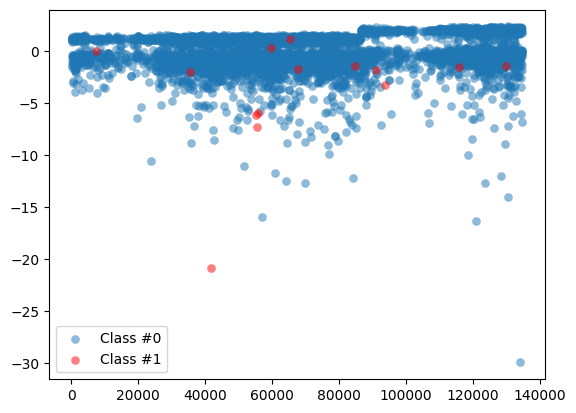

In [63]:
plt.scatter(X[y == 0].iloc[:, 1], X[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1].iloc[:, 1], X[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.legend()

# Applying SMOTE

This dataset is imbalanced as number of fraud cases is very less as compared to non-fraud case

Imbalance dataset needs to be balanced before training the model - Imbalanced data can lead to biased models.

To balance , we will use Synthetic Minority Over-sampling Technique (SMOTE) which creates new, synthetic, samples that are quite similar to the existing observations in the minority class.

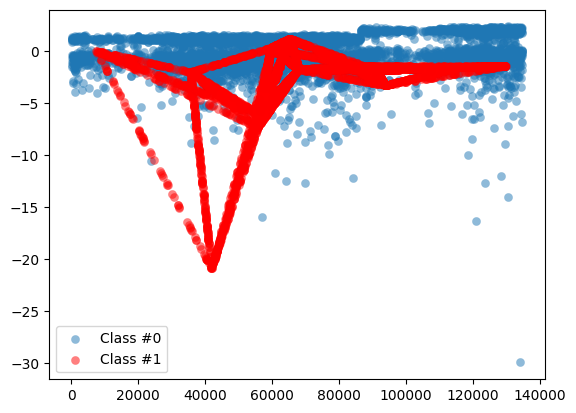

In [64]:
from imblearn.over_sampling import SMOTE
method=SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

plt.scatter(X_resampled[y_resampled == 0].iloc[:, 1], X_resampled[y_resampled == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_resampled[y_resampled == 1].iloc[:, 1], X_resampled[y_resampled == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.legend()

# Compare SMOTE to original Data

0.0    5708
1.0      14
Name: Class, dtype: int64
0.0    5708
1.0    5708
Name: Class, dtype: int64


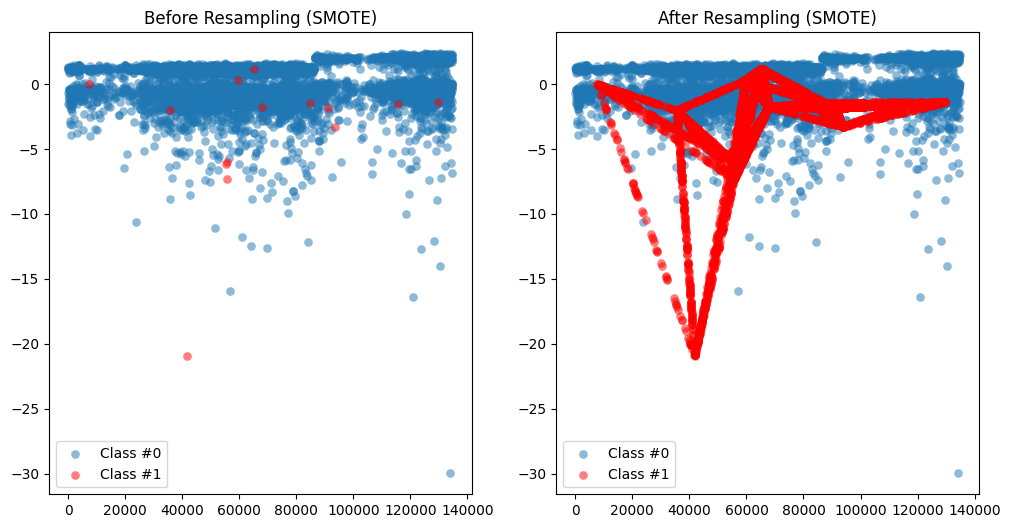

In [67]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before resampling
axes[0].scatter(X[y == 0].iloc[:, 1], X[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[0].scatter(X[y == 1].iloc[:, 1], X[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
axes[0].set_title("Before Resampling (" + "SMOTE" + ")")
axes[0].legend()

# After resampling
axes[1].scatter(X_resampled[y_resampled == 0].iloc[:, 1], X_resampled[y_resampled == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[1].scatter(X_resampled[y_resampled == 1].iloc[:, 1], X_resampled[y_resampled == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
axes[1].set_title("After Resampling (" + "SMOTE" + ")")
axes[1].legend()

plt.show()


SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class.

# Traditional Method - Rule Based Identification of Fraud

In [69]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df["V1"]<-3,df["V3"]<-5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0.0            5689  19
1.0              10   4


with this rule, we detect 4 out of 14 fraud cases, but can't detect the other 10, and get 19 false positives.

# Using ML classification to catch fraud

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test,predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1711
         1.0       0.67      0.67      0.67         6

    accuracy                           1.00      1717
   macro avg       0.83      0.83      0.83      1717
weighted avg       1.00      1.00      1.00      1717

Confusion matrix:
 [[1709    2]
 [   2    4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Using Pipeline

In [72]:
from imblearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE


# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE resampling
    ('logistic', LogisticRegression(random_state=42))  # Logistic regression
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1711
         1.0       0.08      0.83      0.15         6

    accuracy                           0.97      1717
   macro avg       0.54      0.90      0.57      1717
weighted avg       1.00      0.97      0.98      1717

Confusion matrix:
 [[1709    2]
 [   2    4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
